In [13]:
import pytesseract
import cv2

In [14]:
img = cv2.imread("snapshots/test.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
txt = pytesseract.image_to_data(img_rgb)

In [15]:
from collections import namedtuple
import csv

Box = namedtuple("Box", ["x", "y", "w", "h", "text"])
def parse_boxes(data: str) -> list[Box]:
    reader = csv.reader(data.splitlines()[1:], delimiter="\t")
    boxes = []
    for row in reader:
        if len(row) == 12:
            boxes.append(Box(x=int(row[6]), y=int(row[7]), w=int(row[8]), h=int(row[9]), text=row[11]))
    return boxes

boxes = parse_boxes(txt)

In [16]:
from io import StringIO
import pandas as pd
df = pd.read_csv(StringIO(txt), sep='\t')

In [17]:
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,765,503,-1.0,NaN
1,2,1,1,0,0,0,84,481,419,1,-1.0,NaN
2,3,1,1,1,0,0,84,481,419,1,-1.0,NaN
3,4,1,1,1,1,0,84,481,419,1,-1.0,NaN
4,5,1,1,1,1,1,84,481,419,1,95.0,
5,2,1,2,0,0,0,0,0,0,503,-1.0,NaN
6,3,1,2,1,0,0,0,0,0,503,-1.0,NaN
7,4,1,2,1,1,0,0,0,0,503,-1.0,NaN
8,5,1,2,1,1,1,0,0,0,503,95.0,
9,2,1,3,0,0,0,0,131,1,324,-1.0,NaN


In [18]:
import matplotlib.pyplot as plt
def show_box(box: Box, ax):
    x0, y0 = box.x, box.y
    w, h = box.w, box.h
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

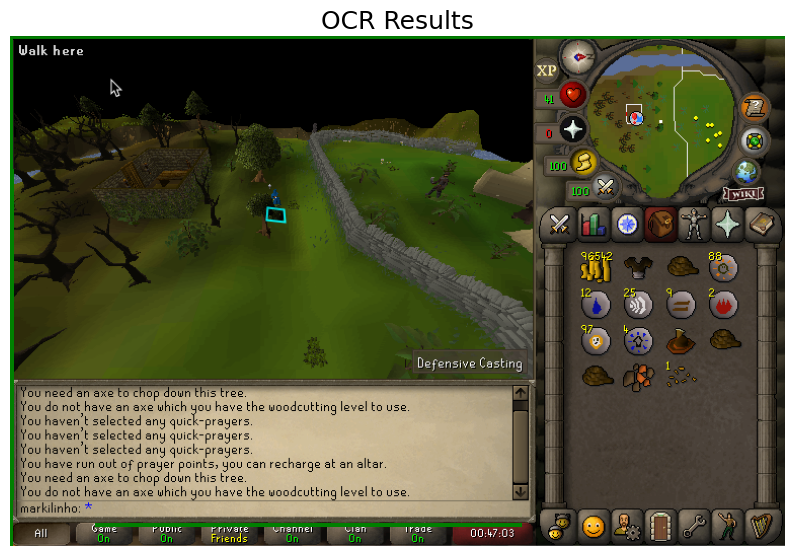

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
for box in boxes:
    show_box(box, plt.gca())
plt.title(f"OCR Results", fontsize=18)
plt.axis('off')
plt.show()

The OCR algorithm tries to apply filters before hand to create a greater contrast between the text and background, but this doesn't work well for Runescape. Let's try and create a custom filter for RS.

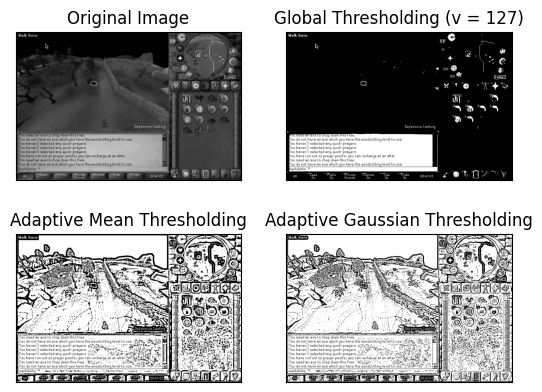

In [20]:
img = cv2.imread('snapshots/test.png', cv2.IMREAD_GRAYSCALE)
# img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
cv2.imwrite("test_mean.png", th2)
cv2.imwrite("test_guass.png", th3)
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

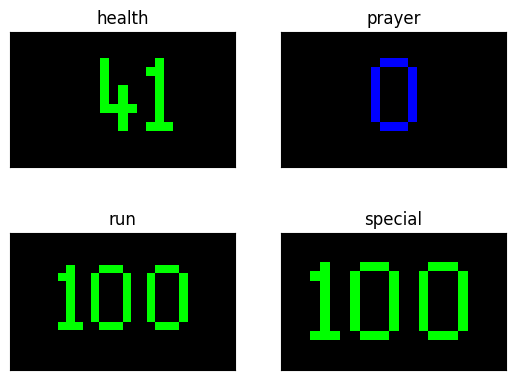

In [22]:
img = cv2.imread('snapshots/test.png')
health = [(1037, 111), (1087, 141)]
prayer = [(1038, 178), (1089, 209)]
run = [(1054, 241), (1110, 275)]
special = [(1104, 293), (1151, 320)]

titles = ['health', 'prayer', 'run', 'special']
rects = [health, prayer, run, special]
images = [img[i[0][1]//2:i[1][1]//2, i[0][0]//2:i[1][0]//2] for i in rects]
images = [cv2.threshold(img,129,255,cv2.THRESH_BINARY)[1] for img in images]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

['41\n', '0\n', '100\n', '100\n']

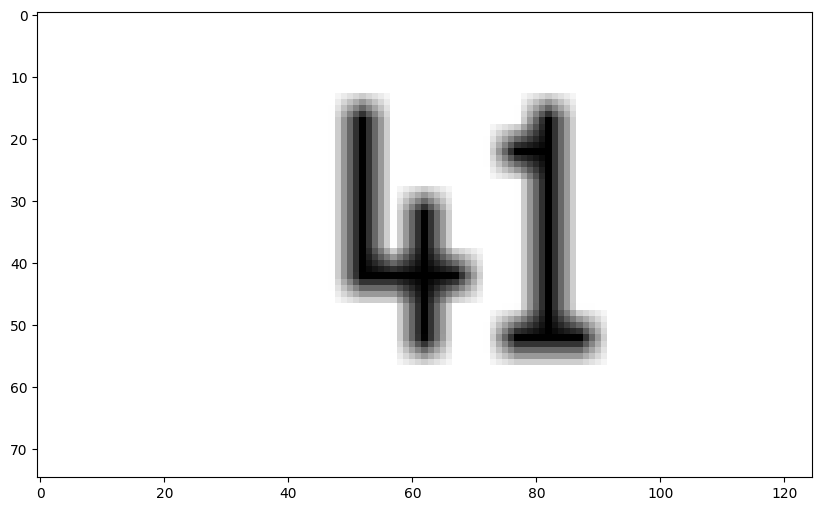

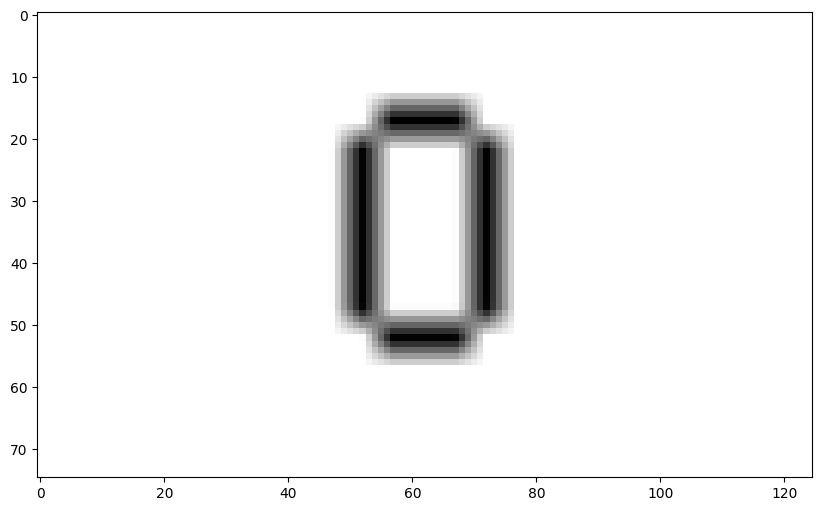

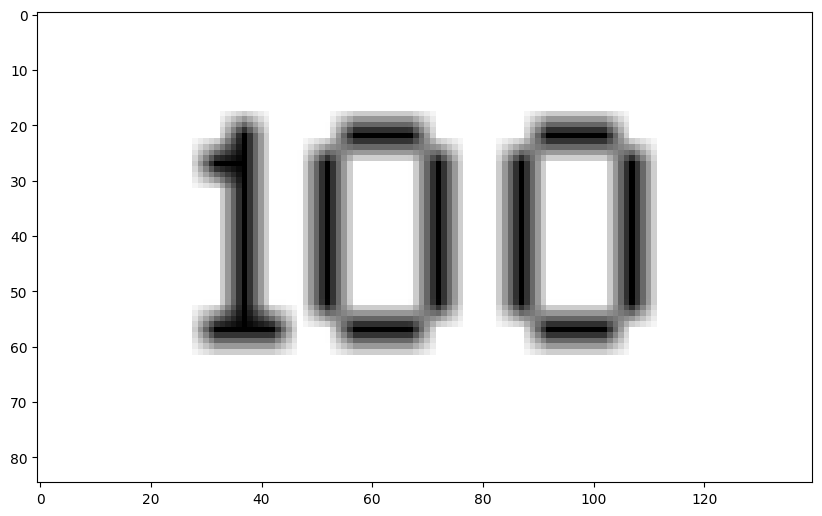

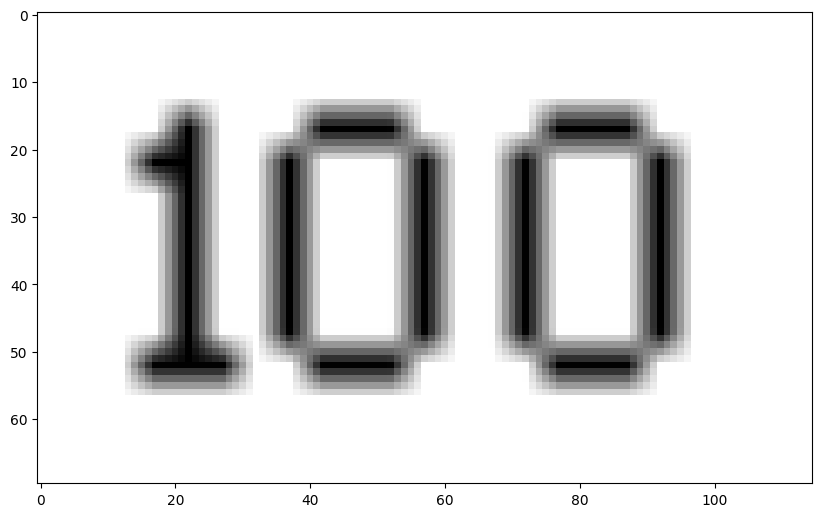

In [24]:
def print_images(images):
    for i in range(4):
        plt.figure(figsize=(10,10))
        plt.imshow(images[i],'gray')

def process_image(img):
    # convert to black and white
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img,30,0,cv2.THRESH_TOZERO)[1]
    img = cv2.bitwise_not(img)
    img = cv2.resize(img, (0,0), fx=5, fy=5)
    return img

processed = [process_image(img) for img in images]
print_images(processed)

[pytesseract.image_to_string(img, config="--psm 7") for img in processed]